# Alignment of Spatial Genomics and Histology Data

In [1]:
import os
import sys
from pathlib import Path
import spateo as st
import numpy as np

sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho

/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.



## Read data and create AnnData object

In [2]:
os.chdir("/media/yao/Yao/Projects/Project_morpho/slices-E8-10_b")
data_folder = 'cellbin_h5ad'
save_image_folder = "slices_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
files = [filename for root1, dirs1, files1 in os.walk(data_folder) for filename in files1][:8]
slices = [st.read_h5ad(os.path.join(data_folder, slices1_file)) for slices1_file in files]
for slice in slices:
    z = slice.obs["slices"].map(lambda x: int(x[-2:]) * 14)
    slice.obsm["align_axis"] = z.to_numpy()
slices

[AnnData object with n_obs × n_vars = 1769 × 9158
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs × n_vars = 1244 × 8992
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs × n_vars = 1715 × 9145
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs × n_vars = 1741 × 9147
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs × n_vars = 1956 × 8976
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs × n_vars = 1700 × 9305
     obs: 'area', 'slices'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial', 'align_axis',
 AnnData object with n_obs ×

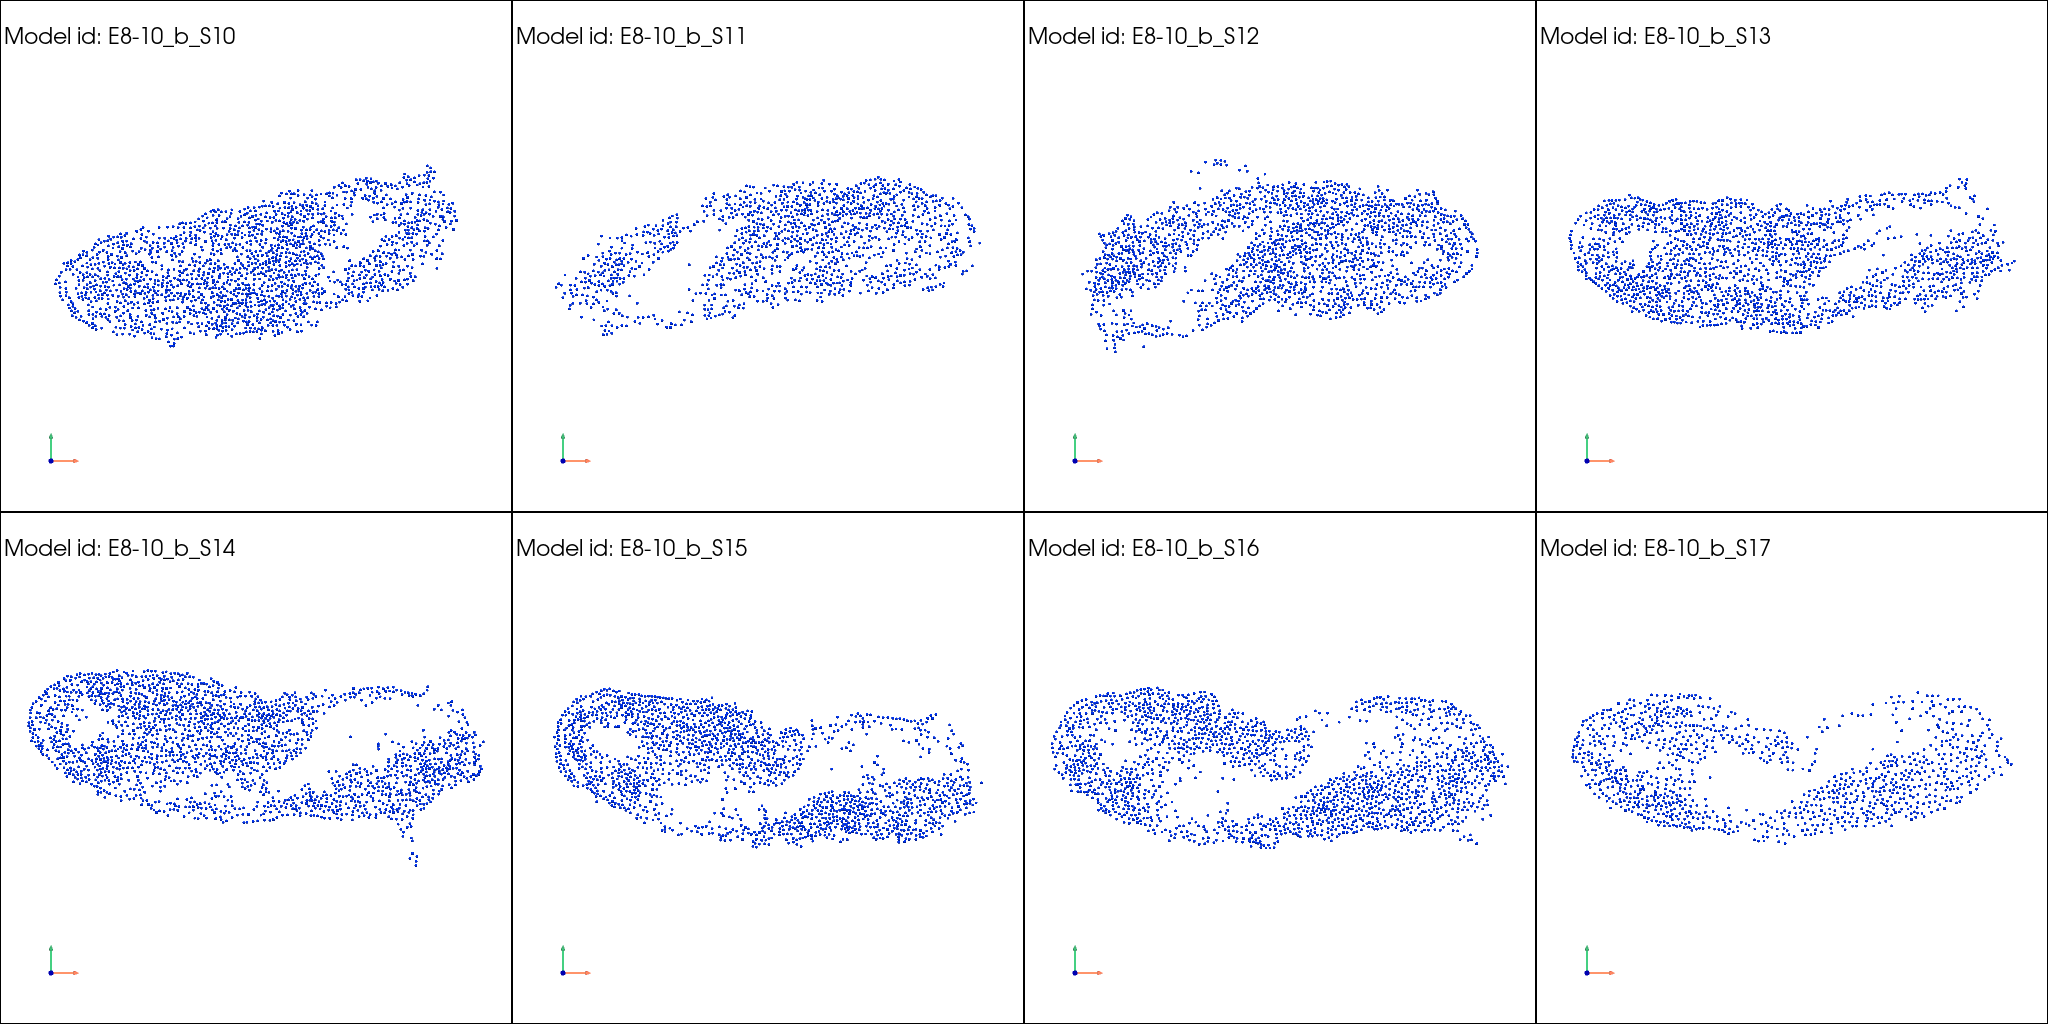

In [4]:
_ = morpho.multi_models(
    slices, spatial_key="spatial", center_zero=True, id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_raw_spatial_slices.png")
)

## Slices alignment based on Morpho

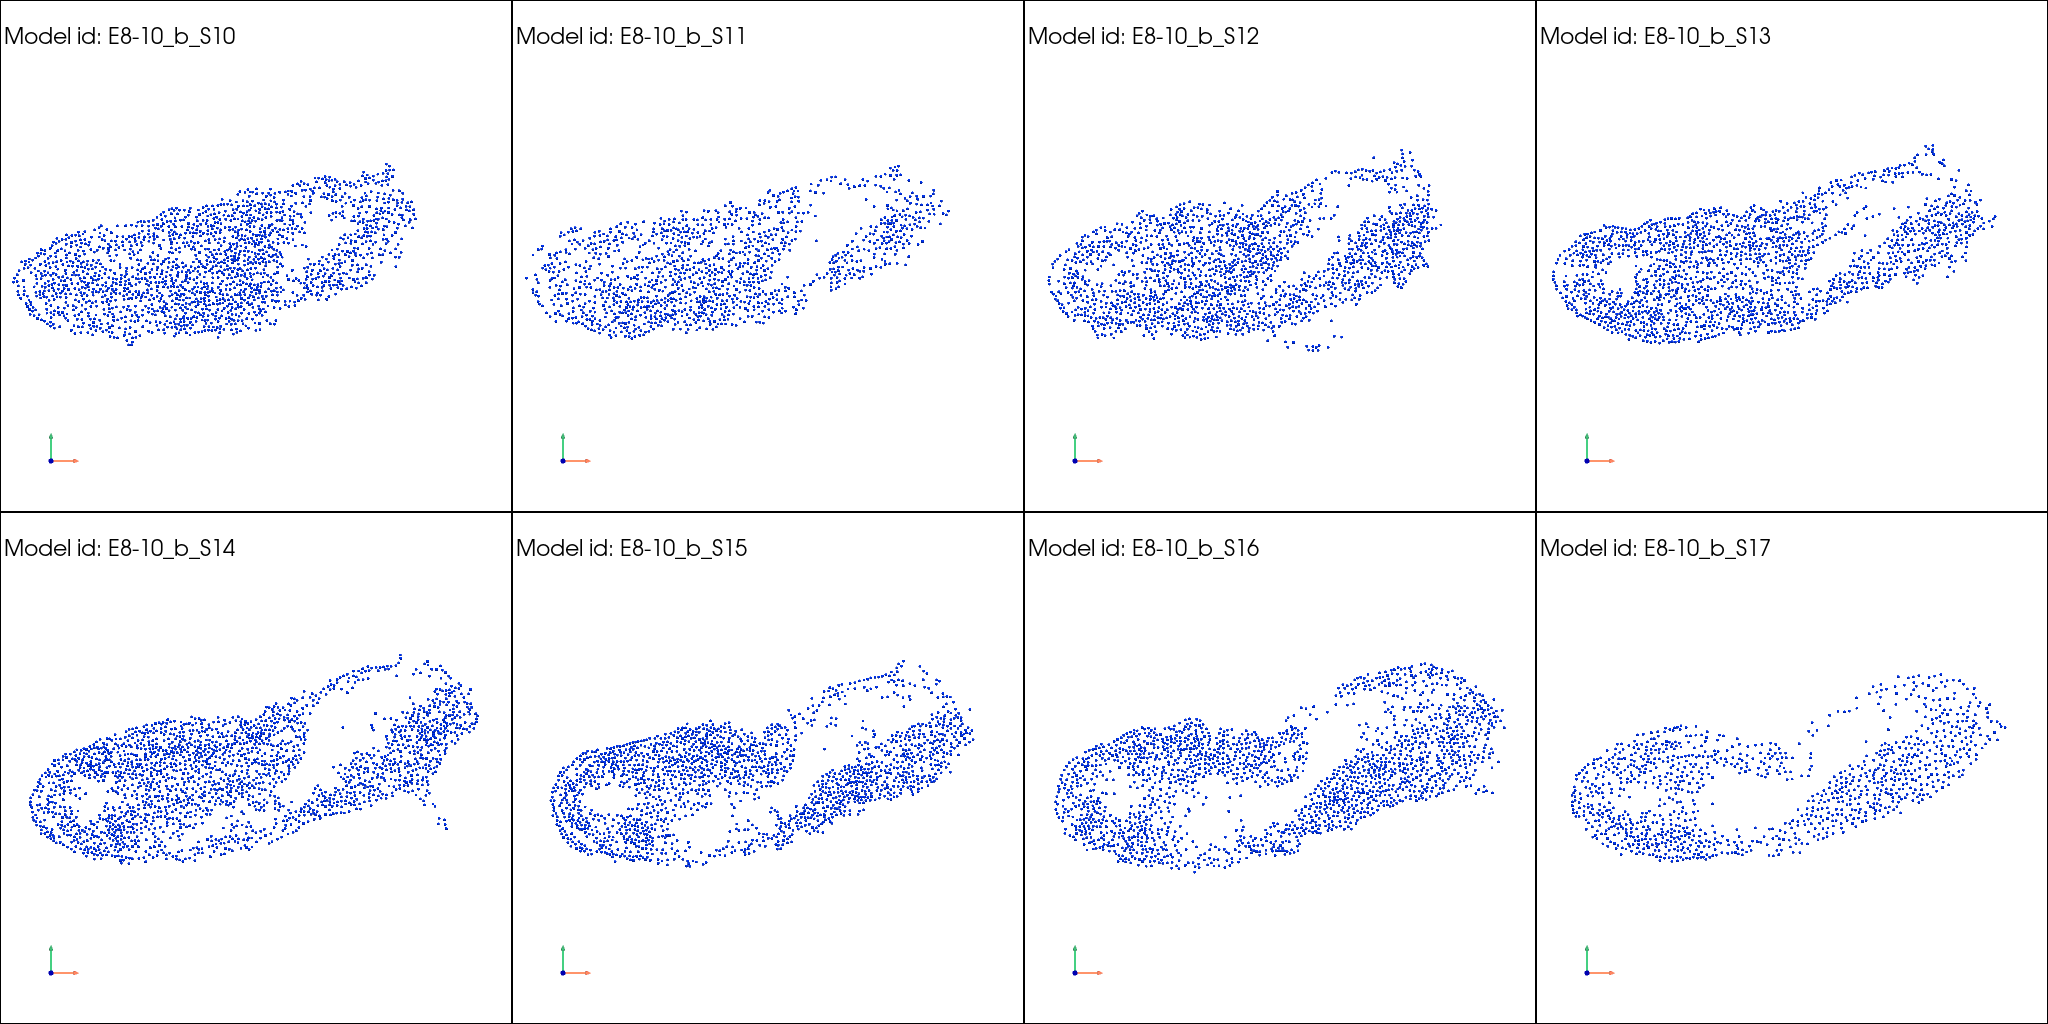

In [5]:
align_slices1, _ = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    normalize_c=True,
    device="0",
    verbose=False,
)
_ = morpho.multi_models(
    align_slices1, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_morpho_spatial_slices.png")
)

## Slices alignment based on Paste

|-----> [Models alignment] in progress: 14.2857%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 28.5714%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignment] in progress: 42.8571%|-----> Filtered all samples for common genes. There are 8331 common genes.
|-----> [Models alignment] in progress: 57.1429%|-----> Filtered all samples for common genes. There are 8256 common genes.
|-----> [Models alignment] in progress: 71.4286%|-----> Filtered all samples for common genes. There are 8264 common genes.
|-----> [Models alignment] in progress: 85.7143%|-----> Filtered all samples for common genes. There are 8528 common genes.
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 8191 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [23.6387s]


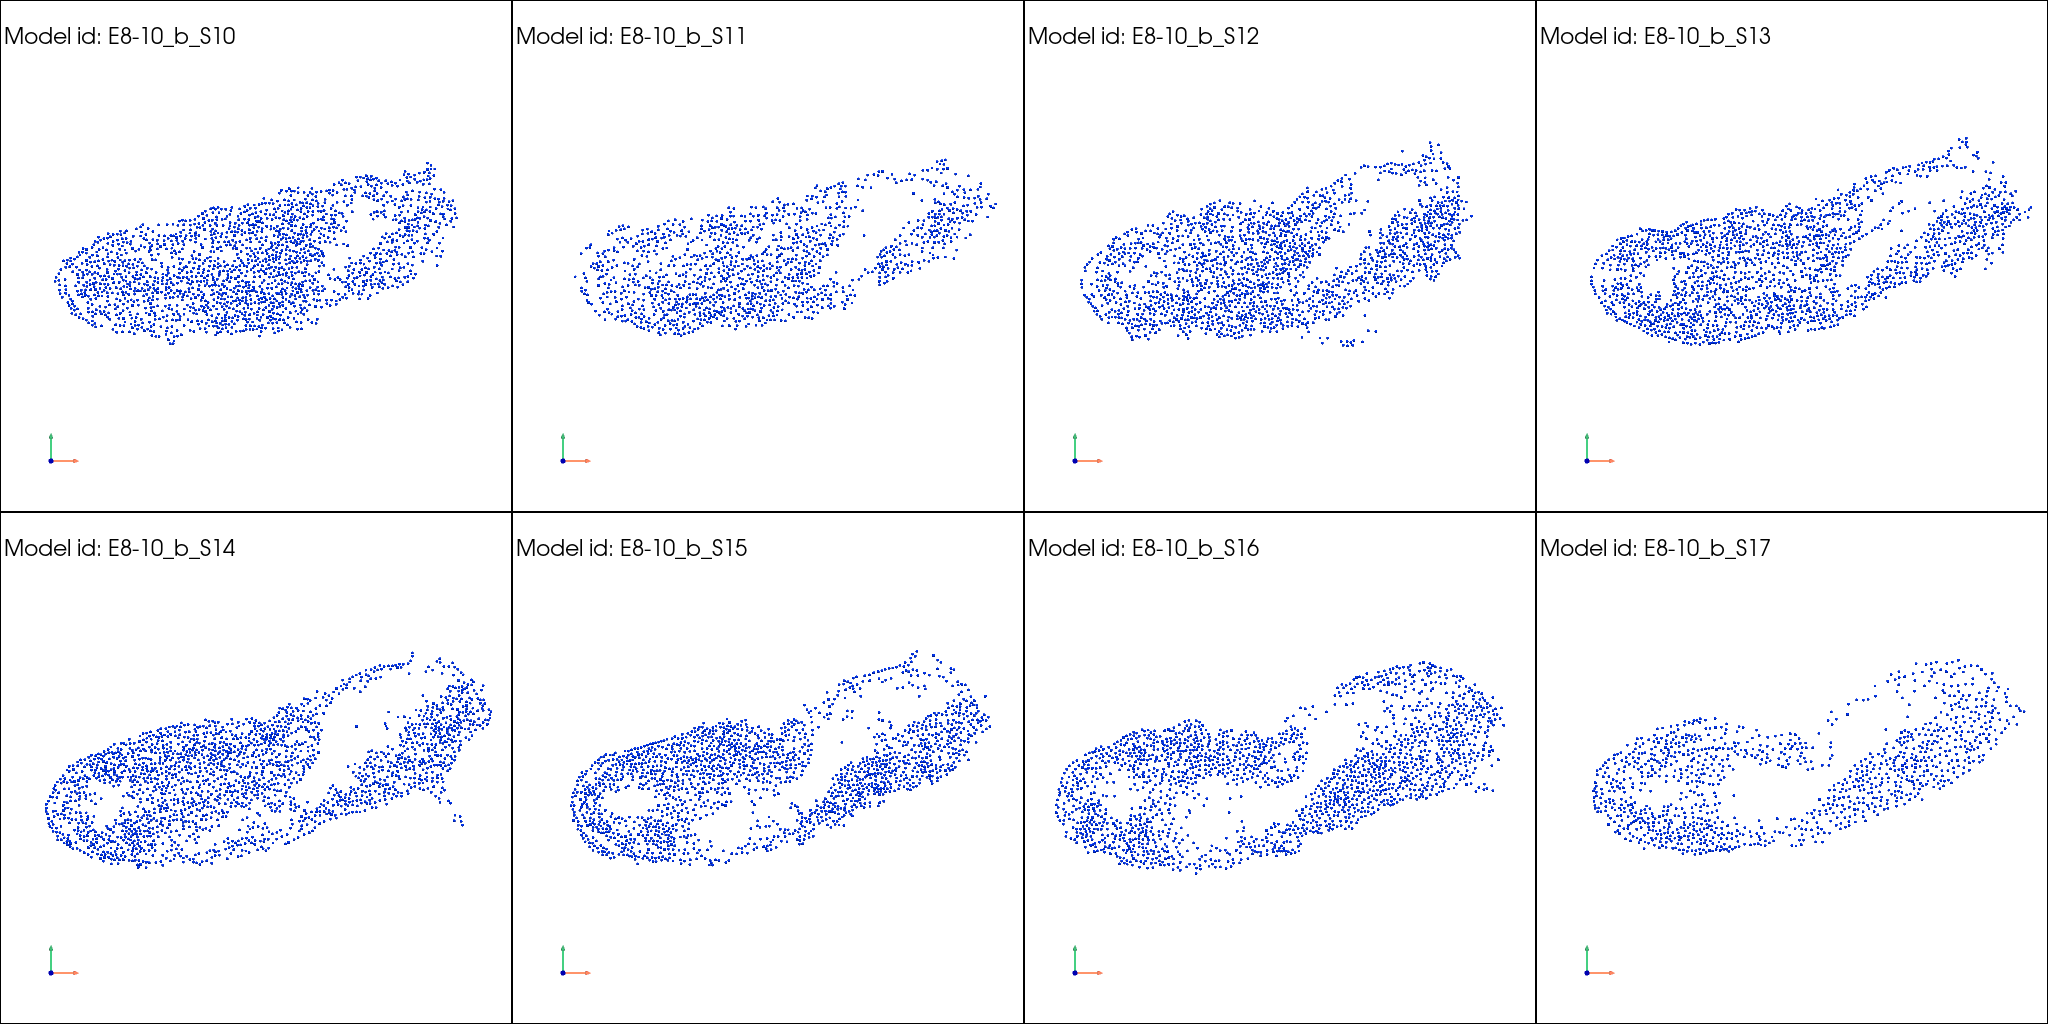

In [6]:
align_slices2, _ = morpho.models_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    alpha=0.01,
    device="0",
)
_ = morpho.multi_models(
    align_slices2, spatial_key="align_spatial", id_key="slices", jupyter="static",
    filename=os.path.join(save_image_folder, "E8-10_b_paste_spatial_slices.png")
)